# Mp expenses data analysis

## Loading libraries

In [28]:
### Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
from matplotlib.patches import Ellipse
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

## Data preprocessing - Google & FTSE

In [29]:
# Read the CSV file, skipping the first row
mpexpense = pd.read_csv("mpexpense_google.csv", skiprows=1)
ftse100 = pd.read_csv("ftse100_mpexpense.csv")
ftseall = pd.read_csv("ftseall_mpexpense.csv")

In [30]:
print(mpexpense.head())
print(ftse100.head())
print(ftseall.head())

          Day  Mps expenses: (United Kingdom)
0  2009-04-14                               0
1  2009-04-15                               0
2  2009-04-16                               0
3  2009-04-17                               0
4  2009-04-18                               0
         Date      Open      High       Low     Close
0  07/01/2009  4,249.21  4,353.03  4,255.23  4,340.71
1  06/30/2009  4,294.03  4,311.23  4,230.63  4,249.21
2  06/29/2009  4,241.01  4,303.55  4,235.19  4,294.03
3  06/26/2009  4,252.57  4,307.16  4,216.46  4,241.01
4  06/25/2009  4,279.98  4,290.36  4,213.40  4,252.57
         Date      Open      High       Low     Close
0  07/01/2009  2,177.73  2,220.86  2,177.73  2,215.78
1  06/30/2009  2,200.48  2,200.48  2,165.16  2,172.08
2  06/29/2009  2,165.16  2,198.41  2,165.16  2,194.11
3  06/26/2009  2,186.31  2,196.35  2,156.17  2,167.29
4  06/25/2009  2,179.05  2,187.72  2,151.70  2,170.40


In [31]:
# Rename the relevance columns
mpexpense = mpexpense.rename(columns={"Day": "Date", "Mps expenses: (United Kingdom)": "Relevance"})
#set relevance column to date time
mpexpense['Date'] = pd.to_datetime(mpexpense['Date'])

### Add lag variable

In [32]:
mpexpense['Relevance_lead1'] = mpexpense['Relevance'].shift(-1)
mpexpense['Relevance_lead2'] = mpexpense['Relevance'].shift(-2)
mpexpense['Relevance_lead3'] = mpexpense['Relevance'].shift(-3)

### Add rolling relevance column - 3 day avg

In [33]:
# Calculate the rolling sum and create a new column with the result
mpexpense['relevance_rolling'] = mpexpense['Relevance'].rolling(window=3, min_periods=1).mean()

In [34]:
ftse100.drop(["Open", "High", "Low"], axis=1, inplace=True)
ftseall.drop(["Open", "High", "Low"], axis=1, inplace=True)
#Change ftse date column to datetime
ftse100['Date'] = pd.to_datetime(ftse100['Date'])
ftseall['Date'] = pd.to_datetime(ftseall['Date'])
#combine ftse data
ftsemerge = pd.merge(ftse100, ftseall, on='Date')

In [35]:
#rename merged ftse columns
ftsemerge.rename(columns={'Close_x': 'FTSE100'}, inplace=True)
ftsemerge.rename(columns={'Close_y': 'FTSEALL'}, inplace=True)

# Replace commas in ftse data so they can be converted to float values
ftsemerge = ftsemerge.replace(',', '', regex=True)

# Convert the ftse columns from string to float
ftsemerge['FTSE100'] = pd.to_numeric(ftsemerge['FTSE100'])
ftsemerge['FTSEALL'] = pd.to_numeric(ftsemerge['FTSEALL'])
#convert combined ftse to datetime
ftsemerge['Date'] = pd.to_datetime(ftsemerge['Date'])

#merge google trend and stock data
df = pd.merge(ftsemerge, mpexpense, on='Date')

#convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by the 'Date' column in ascending order
df = df.sort_values(by='Date')

# Reset index
df = df.reset_index(drop=True)


## Plotting graph - google trend

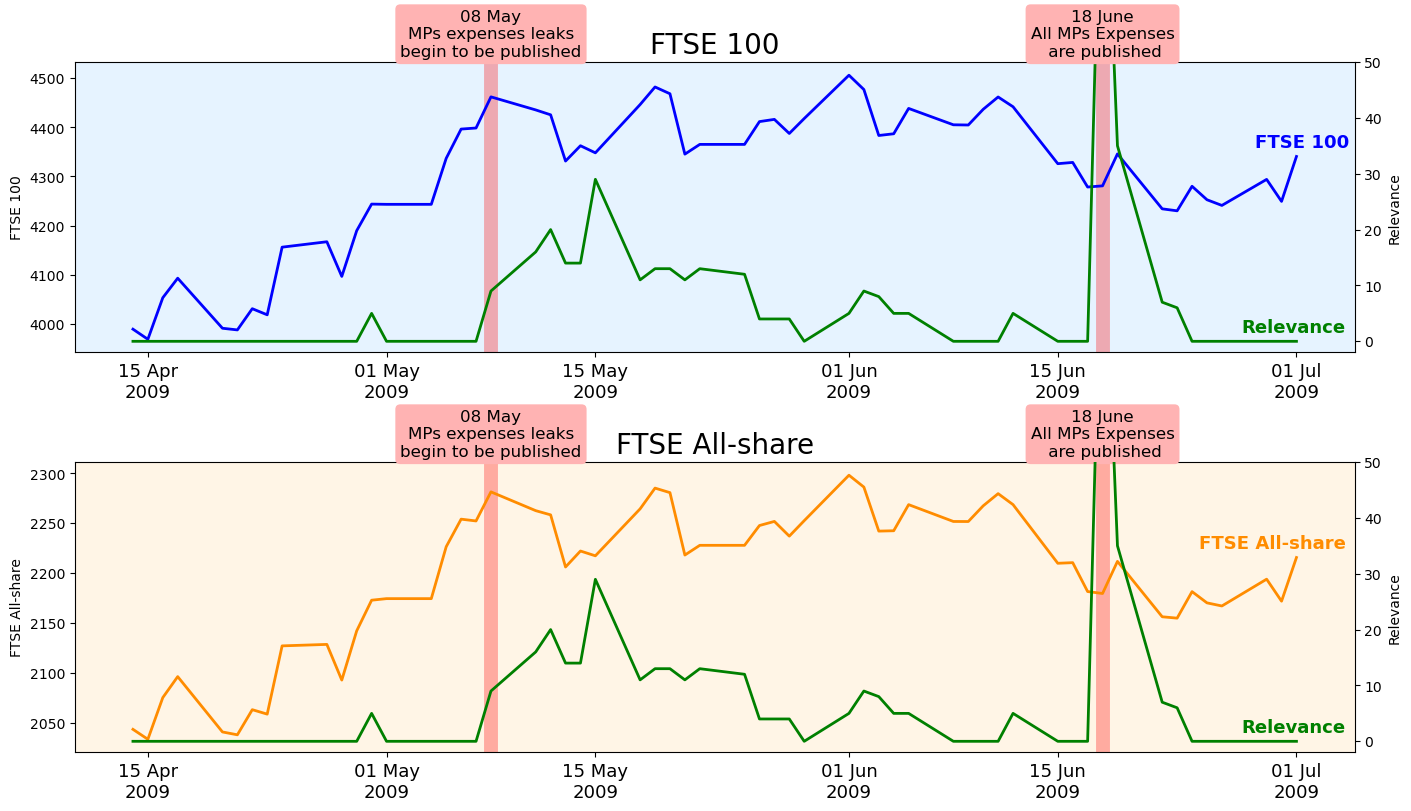

In [36]:
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2009-05-08'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('2009-06-18'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df['Date'], df['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df['Date'], df['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)

ax1_relevance.set_ylim([-2, 50])
##annotate
ax1_relevance.annotate('08 May\nMPs expenses leaks\nbegin to be published',
            xy=(pd.Timestamp('2009-05-08'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax1_relevance.annotate('18 June\nAll MPs Expenses\n are published',
            xy=(pd.Timestamp('2009-06-18'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df['Date'].iloc[-1], df['FTSE100'].iloc[-1]),
             xytext=(-30, 10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df['Date'].iloc[-1], df['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2009-05-08'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('2009-06-18'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df['Date'], df['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df['Date'], df['Relevance'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)

ax2_relevance.set_ylim([-2, 50])

##annotate
ax2_relevance.annotate('08 May\nMPs expenses leaks\nbegin to be published',
            xy=(pd.Timestamp('2009-05-08'), ax2_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax2_relevance.annotate('18 June\nAll MPs Expenses\n are published',
            xy=(pd.Timestamp('2009-06-18'), ax2_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df['Date'].iloc[-1], df['FTSEALL'].iloc[-1]),
             xytext=(-70, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df['Date'].iloc[-1], df['Relevance'].iloc[-1]),
             xytext=(-40, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/MPsexpenses_googletrend.png')  # Save the figure in the "figures" folder
plt.show()

In [37]:
# Save the DataFrame to a CSV file
df.to_csv('mpexpensemerged_googletrend_ftse_preprocessed.csv', index=False)  # Set index=False to exclude the index column from the CSV file

In [38]:
# Save the DataFrame to a Stata file
df.to_stata('mpexpensemerged_googletrend_ftse_preprocessed.dta', version=117) 

# Newspaper

In [39]:
df = pd.read_csv("mpexpenses_newspaper.csv")

In [40]:
# Generate a date range from '2009-04-14' to '2009-07-09'
date_range = pd.date_range(start='2009-04-14', end='2009-07-09', freq='D')

# Calculate the week numbers based on groups of 7 days
week_numbers = ((date_range - date_range[0]).days // 7) + 1

# Create an empty DataFrame with the date range as the index
empty_df = pd.DataFrame(index=date_range)

# Assign the calculated week numbers
empty_df['week'] = week_numbers

# Reset the index to make 'PubDate' a regular column
empty_df = empty_df.reset_index()

# Rename the 'index' column to 'PubDate'
empty_df = empty_df.rename(columns={'index': 'PubDate'})

print(empty_df)

      PubDate  week
0  2009-04-14     1
1  2009-04-15     1
2  2009-04-16     1
3  2009-04-17     1
4  2009-04-18     1
..        ...   ...
82 2009-07-05    12
83 2009-07-06    12
84 2009-07-07    13
85 2009-07-08    13
86 2009-07-09    13

[87 rows x 2 columns]


In [41]:
###convert pubdate to datetime
df['PubDate'] = pd.to_datetime(df['PubDate'], format='%Y/%m/%d')
df['PubDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 262 entries, 0 to 261
Series name: PubDate
Non-Null Count  Dtype         
--------------  -----         
262 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.2 KB


In [42]:
###sort by date
df = df.sort_values(by='PubDate')
df.head()

,Title,Subtitle,Author,Publication,SourceType,Publisher,Volume,Issue,PubDate,AlphaDate,StartPage,EndPage,PageRange,ISSN,EISSN,ISBN,Language,DocumentUrl,DOI
235,"April 17, 2009 (Page 43)",NaN,NaN,(Page 43),Historical Newspapers,NaN,NaN,NaN,2009-04-17,"Apr 17, 2009",43,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
144,"April 17, 2009 (Page 9)",NaN,NaN,(Page 9),Historical Newspapers,NaN,NaN,NaN,2009-04-17,"Apr 17, 2009",9,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
231,"April 20, 2009 (Page 16)",NaN,NaN,(Page 16),Historical Newspapers,NaN,NaN,NaN,2009-04-20,"Apr 20, 2009",16,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
247,"April 20, 2009 (Page 53)",NaN,NaN,(Page 53),Historical Newspapers,NaN,NaN,NaN,2009-04-20,"Apr 20, 2009",53,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN
219,"April 20, 2009 (Page 7)",NaN,NaN,(Page 7),Historical Newspapers,NaN,NaN,NaN,2009-04-20,"Apr 20, 2009",7,NaN,NaN,1472-5215,NaN,NaN,ENG,https://uoelibrary.idm.oclc.org/login?url=http...,NaN


In [43]:
# Add a new column 'occurrences' with a constant value of 1
df['occurrences'] = 1

In [44]:
# Selecting only the 'PubDate' and 'occurrences' columns
df = df.loc[:, ['PubDate', 'occurrences']]

In [45]:
# Group by 'PubDate' and sum the 'occurrences'
df = df.groupby('PubDate', as_index=False)['occurrences'].sum()
print(df)

      PubDate  occurrences
0  2009-04-17            2
1  2009-04-20            4
2  2009-04-21            2
3  2009-04-22            1
4  2009-04-23            4
5  2009-04-24            2
6  2009-04-27            1
7  2009-04-28            3
8  2009-04-29            3
9  2009-04-30            3
10 2009-05-01            4
11 2009-05-05            4
12 2009-05-06            2
13 2009-05-08            8
14 2009-05-11            5
15 2009-05-12            8
16 2009-05-13            8
17 2009-05-14           10
18 2009-05-15            8
19 2009-05-18            9
20 2009-05-19            7
21 2009-05-20           10
22 2009-05-21            4
23 2009-05-22            5
24 2009-05-26            6
25 2009-05-27            8
26 2009-05-28            9
27 2009-05-29            8
28 2009-06-01            9
29 2009-06-02            8
30 2009-06-03            9
31 2009-06-04            5
32 2009-06-05            6
33 2009-06-08            5
34 2009-06-09            4
35 2009-06-10            4
3

In [46]:
# Reset the index of empty_df to have 'weeks' as a regular column
empty_df.reset_index(inplace=True)


# Merge empty_df with df based on the 'PubDate' column
merged_df = pd.merge(empty_df, df[['PubDate', 'occurrences']], on='PubDate', how='left')

merged_df.rename(columns={'PubDate': 'Date'}, inplace=True)
merged_df['occurrences'] = merged_df['occurrences'].fillna(0)

print(merged_df)

    index       Date  week  occurrences
0       0 2009-04-14     1          0.0
1       1 2009-04-15     1          0.0
2       2 2009-04-16     1          0.0
3       3 2009-04-17     1          2.0
4       4 2009-04-18     1          0.0
..    ...        ...   ...          ...
82     82 2009-07-05    12          0.0
83     83 2009-07-06    12          0.0
84     84 2009-07-07    13          0.0
85     85 2009-07-08    13          0.0
86     86 2009-07-09    13          0.0

[87 rows x 4 columns]


### Add rolling occurence column - 3 day

In [47]:
# Calculate the rolling sum and create a new column with the result
merged_df['occurrences_rolling'] = merged_df['occurrences'].rolling(window=3, min_periods=1).mean()

### Add lag variable 

In [48]:
# Assuming df is your DataFrame
merged_df['occurrences_lead1'] = merged_df['occurrences'].shift(-1)
# Assuming df is your DataFrame
merged_df['occurrences_lead2'] = merged_df['occurrences'].shift(-2)
# Assuming df is your DataFrame
merged_df['occurrences_lead3'] = merged_df['occurrences'].shift(-3)

### Combine newspaper and FTSE data

In [49]:
#merge google trend and stock data
df = pd.merge(ftsemerge, merged_df, on='Date')

In [50]:
# Assuming df is your DataFrame
df = df.sort_values(by='Date')

In [51]:
df.head()

,Date,FTSE100,FTSEALL,index,week,occurrences,occurrences_rolling,occurrences_lead1,occurrences_lead2,occurrences_lead3
56,2009-04-14,3988.99,2043.86,0,1,0.0,0.000000,0.0,0.0,2.0
55,2009-04-15,3968.40,2033.91,1,1,0.0,0.000000,0.0,2.0,0.0
54,2009-04-16,4052.98,2075.60,2,1,0.0,0.000000,2.0,0.0,0.0
53,2009-04-17,4092.80,2096.60,3,1,2.0,0.666667,0.0,0.0,4.0
52,2009-04-20,3990.86,2041.24,6,1,4.0,1.333333,2.0,1.0,4.0


### Plot graph newspaper

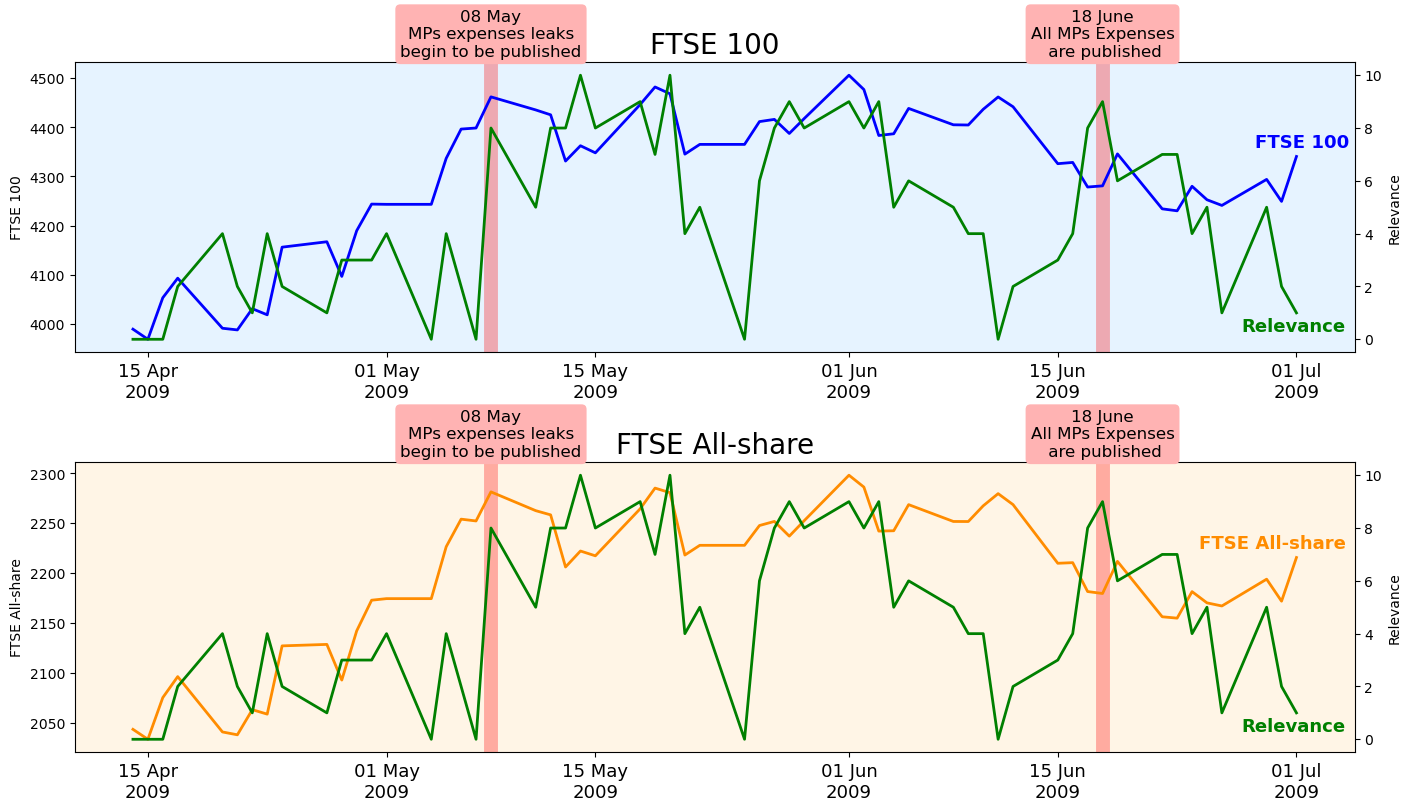

In [52]:
plt.style.use('default')
date_format = mdates.DateFormatter('%d %b\n%Y')
fig, axes = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(14, 8))
axes = axes.flatten()
ax1 = axes[0]
ax2 = axes[1]
ax1.set_facecolor('#e6f3ff')
ax2.set_facecolor('#fff5e6')
# Plot on the first subplot
# Add vertical lines
ax1.axvline(x=pd.Timestamp('2009-05-08'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax1.axvline(x=pd.Timestamp('2009-06-18'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line1, = ax1.plot(df['Date'], df['FTSE100'], label='FTSE 100', color='blue',zorder=4, linewidth=2,alpha=1)
#ax1.fill_between(df['Date'], df['FTSE100'], color='blue', alpha=0.1,zorder=2)
ax1.set_ylabel('FTSE 100')
ax1.set_title('FTSE 100', fontsize=20, color='black')

# Plot the 'Relevance' data on the same subplot
ax1_relevance = ax1.twinx()
line2, = ax1_relevance.plot(df['Date'], df['occurrences'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=3)
ax1_relevance.set_ylabel('Relevance', color='black')

#colour axis
ax1_relevance.tick_params(axis='y', color='black')
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax1_relevance.spines['top'].set_visible(False)
ax1_relevance.spines['right'].set_visible(False)
ax1_relevance.spines['bottom'].set_visible(False)
ax1_relevance.spines['left'].set_visible(False)


##annotate
ax1_relevance.annotate('08 May\nMPs expenses leaks\nbegin to be published',
            xy=(pd.Timestamp('2009-05-08'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax1_relevance.annotate('18 June\nAll MPs Expenses\n are published',
            xy=(pd.Timestamp('2009-06-18'), ax1_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax1.annotate('FTSE 100', xy=(df['Date'].iloc[-1], df['FTSE100'].iloc[-1]),
             xytext=(-30, 10), textcoords='offset points',
             ha='left', va='center', color=line1.get_color(), fontsize=13, zorder=100, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.0',facecolor='none',edgecolor='none'))

ax1_relevance.annotate('Relevance', xy=(df['Date'].iloc[-1], df['occurrences'].iloc[-1]),
             xytext=(-40, -10), textcoords='offset points',
             ha='left', va='center', color=line2.get_color(), fontsize=13, zorder=100, fontweight='bold',
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)

# SECONDPLOT
# Add vertical lines
ax2.axvline(x=pd.Timestamp('2009-05-08'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
ax2.axvline(x=pd.Timestamp('2009-06-18'), color='red', linestyle='-', zorder=-1,linewidth=10, alpha=0.3)
line3, = ax2.plot(df['Date'], df['FTSEALL'], label='FTSE All-share', color='darkorange',linewidth=2,zorder=7, alpha=1)
ax2.set_ylabel('FTSE All-share')
ax2.set_title('FTSE All-share', fontsize=20, color='black')
# Plot the 'Relevance' data on the same subplot
ax2_relevance = ax2.twinx()
line4, = ax2_relevance.plot(df['Date'], df['occurrences'], color='green', alpha=1, label='Relevance',linewidth=2,zorder=5)
ax2_relevance.set_ylabel('Relevance', color='black')
#colour axis
ax2_relevance.tick_params(axis='y', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x',labelsize=13)
# Remove border around the plot
ax2_relevance.spines['top'].set_visible(False)
ax2_relevance.spines['right'].set_visible(False)
ax2_relevance.spines['bottom'].set_visible(False)
ax2_relevance.spines['left'].set_visible(False)



##annotate
ax2_relevance.annotate('08 May\nMPs expenses leaks\nbegin to be published',
            xy=(pd.Timestamp('2009-05-08'), ax2_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points', size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

ax2_relevance.annotate('18 June\nAll MPs Expenses\n are published',
            xy=(pd.Timestamp('2009-06-18'), ax2_relevance.get_ylim()[1]), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            size=12, va="center", ha='center',
            bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"))

# Annotate the end of the lines with their labels
ax2.annotate('FTSE All-share', xy=(df['Date'].iloc[-1], df['FTSEALL'].iloc[-1]),
             xytext=(-70, 10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line3.get_color(), fontsize=13, zorder=100,
                bbox=dict(boxstyle='round,pad=0.1',facecolor='none',edgecolor='none'))

ax2_relevance.annotate('Relevance', xy=(df['Date'].iloc[-1], df['occurrences'].iloc[-1]),
             xytext=(-40, -10), textcoords='offset points', fontweight='bold',
             ha='left', va='center', color=line4.get_color(), fontsize=13, zorder=100,
                      bbox=dict(boxstyle='round4,pad=0.0',facecolor='none',edgecolor='none'))

plt.gca().xaxis.set_major_formatter(date_format)
plt.savefig('figures/MPsexpenses_newspaper.png')  # Save the figure in the "figures" folder
plt.show()

### Save to CSV

In [53]:
df.to_csv('mpsexpense_newspaper_ftse_preprocessed.csv', index=False)

### Save to stata data file

In [54]:
df.to_stata('mpsexpense_newspaper_ftse_preprocessed.dta', version=117)